In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preperation

In [2]:
#concaterate data

years = range(2015, 2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path ='yob%d.txt' %year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index = True)

## Data Exploration
### Overview

In [3]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130754 entries, 0 to 130753
Data columns (total 4 columns):
name      130754 non-null object
sex       130754 non-null object
births    130754 non-null int64
year      130754 non-null int64
dtypes: int64(2), object(2)
memory usage: 4.0+ MB


In [4]:
names.head()

,name,sex,births,year
0,Emma,F,20455,2015
1,Olivia,F,19691,2015
2,Sophia,F,17417,2015
3,Ava,F,16378,2015
4,Isabella,F,15617,2015


In [5]:
# sum of births by sex
names.groupby('sex').births.sum()

sex
F    6952764
M    7446351
Name: births, dtype: int64

In [6]:
# aggregate data at year and sex level

total_births = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)
total_births

sex,F,M
year,,
2015,1780453,1911537
2016,1766212,1891585
2017,1719138,1842837
2018,1686961,1800392


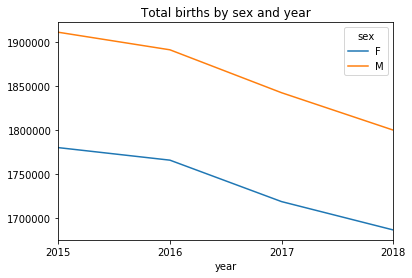

In [7]:
total_births.plot(title="Total births by sex and year", xticks =[2015, 2016, 2017, 2018])

In [8]:
# insert a column prop with the fraction of babies given 
# each name relative to the total number of births

def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births/births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Emma,F,20455,2015,0.011489
1,Olivia,F,19691,2015,0.011060
2,Sophia,F,17417,2015,0.009782
3,Ava,F,16378,2015,0.009199
4,Isabella,F,15617,2015,0.008771


In [9]:
# use np.allclose to check that the group sums are sufficiently
# close to 1

np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

### Exploring name diversity

In [10]:
# extract top 1000 names for each sex/year combination

def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'], as_index=False)
top1000 = grouped.apply(get_top1000)
top1000.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8000 entries, (0, 0) to (7, 117749)
Data columns (total 5 columns):
name      8000 non-null object
sex       8000 non-null object
births    8000 non-null int64
year      8000 non-null int64
prop      8000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 398.5+ KB


In [11]:
# split names into boys and girls

boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']
boys.head()

name sex  births  year      prop
1 19091     Noah   M   19635  2015  0.010272
  19092     Liam   M   18374  2015  0.009612
  19093    Mason   M   16627  2015  0.008698
  19094    Jacob   M   15949  2015  0.008344
  19095  William   M   15909  2015  0.008323

In [12]:

total_births = top1000.pivot_table('prop', index='year', columns='name',
                                  aggfunc=sum)
total_births

name,Aaden,Aadhya,Aaliyah,Aarav,Aaron,Aarush,Abby,Abdiel,Abdullah,Abel,...,Zev,Zhavia,Zion,Zoe,Zoey,Zoie,Zola,Zora,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
2015,0.000155,NaN,0.002731,0.000282,0.003745,0.00011,0.000408,0.000133,0.000207,0.001694,...,NaN,NaN,0.001054,0.003393,0.003900,0.000208,NaN,NaN,0.000401,NaN
2016,NaN,0.000161,0.002628,0.000274,0.003784,NaN,0.000411,0.000174,0.000215,0.001602,...,NaN,NaN,0.001139,0.003252,0.003648,0.000177,NaN,NaN,0.000503,0.000131
2017,0.000131,0.000169,0.002428,0.000285,0.003905,NaN,0.000405,0.000204,0.000180,0.001465,...,NaN,NaN,0.001235,0.003000,0.003516,0.000188,NaN,NaN,0.000494,0.000163
2018,NaN,NaN,0.002259,0.000271,0.003307,NaN,0.000387,0.000244,0.000194,0.001479,...,0.000117,0.000181,0.001196,0.003001,0.003497,0.000190,0.000163,0.000159,0.000665,0.000179


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c0ced6a58>,
      dtype=object)

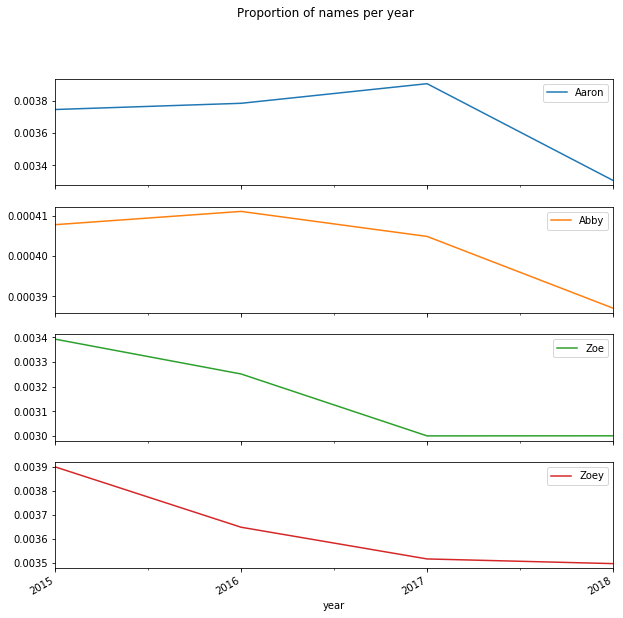

In [13]:
subset = total_births[['Aaron', 'Abby', 'Zoe', 'Zoey']]
subset.plot(subplots=True,figsize=(10, 10), grid =False,
           title="Proportion of names per year", xticks=[2015, 2016, 2017, 2018])

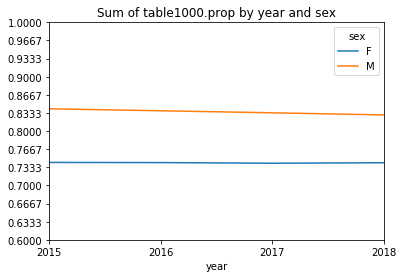

In [14]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0.6, 1, 13), xticks=range(2015, 2019))

As shown on the graph above usage of popular names is slightly decreasing from 2015 to 2018.

In [15]:
df = boys[boys.year==2015]
prop_cumsum= df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

134

In [16]:
df = boys[boys.year==2016]
prop_cumsum= df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

138

In [17]:
df = boys[boys.year==2017]
prop_cumsum= df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

142

In [18]:
df = boys[boys.year==2018]
prop_cumsum= df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

148

The previous 4 outputs also show that the proportion of popular boys names is decreasing from 2017 to 2018. In other words, name diversity has been increasing every year.

### Exploring last letters of names

In [19]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

last_letters.head()

0    a
1    a
2    a
3    a
4    a
Name: last_letter, dtype: object

In [20]:
table = names.pivot_table('births', index = last_letters,
                         columns = ['sex', 'year'], aggfunc=sum)

table.head()

sex               F                               M                        
year           2015    2016    2017    2018    2015    2016    2017    2018
last_letter                                                                
a            660321  657612  652257  646970   28994   29703   30226   30691
b               596     655     572     576   29583   26973   24501   22563
c              1255    1297    1179    1115   23128   22040   20534   19338
d              3252    3442    3485    3516   43748   42979   42056   41585
e            326957  325914  310967  300769  128504  125930  121785  119409

In [21]:
#normalizing the table

letter_prop = table/table.sum().astype(float)
letter_prop.head()

sex                 F                                       M            \
year             2015      2016      2017      2018      2015      2016   
last_letter                                                               
a            0.370872  0.372329  0.379409  0.383512  0.015168  0.015703   
b            0.000335  0.000371  0.000333  0.000341  0.015476  0.014259   
c            0.000705  0.000734  0.000686  0.000661  0.012099  0.011652   
d            0.001827  0.001949  0.002027  0.002084  0.022886  0.022721   
e            0.183637  0.184527  0.180885  0.178290  0.067225  0.066574   

sex                              
year             2017      2018  
last_letter                      
a            0.016402  0.017047  
b            0.013295  0.012532  
c            0.011143  0.010741  
d            0.022821  0.023098  
e            0.066086  0.066324

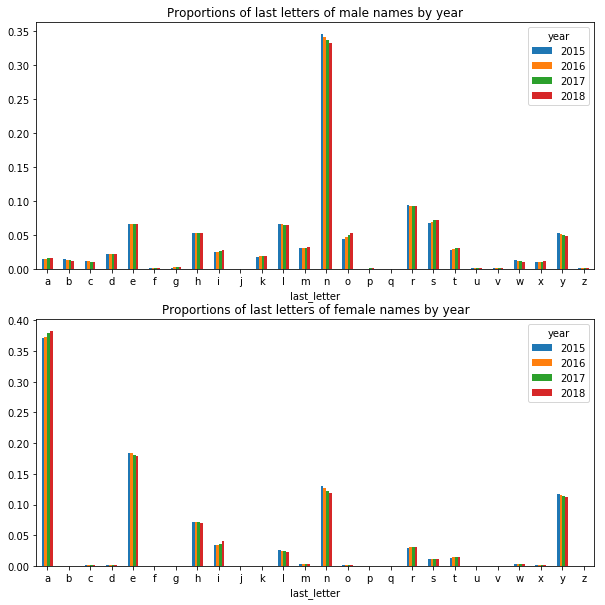

In [22]:
# make bar plots for last letter proportions for each sex, broken down by year
fig, axes = plt.subplots(2, 1, figsize=(10,10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title="Proportions of last letters of male names by year")
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title="Proportions of last letters of female names by year")

The two graphs above show how male names ending with the letter 'n' have decreased in popularity from 2015 to 2018.
Girl names ending with 'a' have become more popular over those years.

/home/nata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


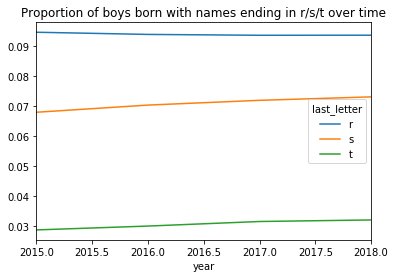

In [24]:
rst_ts=letter_prop.ix[['r', 's', 't'], 'M'].T
rst_ts.plot(title="Proportion of boys born with names ending in r/s/t over time")

### Exploring unisex names

In [66]:
all_names = names.name.unique()
mask = np.array(['Alex' in x for x in all_names])
alex_like = all_names[mask]
alex_like

array(['Alexa', 'Alexis', 'Alexandra', 'Alexandria', 'Alexia', 'Alex',
       'Alexus', 'Alexi', 'Alexandrea', 'Alexxa', 'Alexys', 'Alexsandra',
       'Alexah', 'Alexie', 'Alexzandria', 'Alexiana', 'Alexander',
       'Alexiah', 'Alexianna', 'Alexzandra', 'Alexsa', 'Alexya',
       'Alexcia', 'Alexza', 'Alexsia', 'Alexxis', 'Alexius', 'Alexei',
       'Alexine', 'Alexandrya', 'Alexsis', 'Alexx', 'Alexzander',
       'Alexandre', 'Alexavier', 'Alexandro', 'Alexandros', 'Alexandru',
       'Alexey', 'Alexsander', 'Alexandr', 'Alexandar', 'Alexxander',
       'Alexanderjames', 'Alexsandro', 'Alexio', 'Alexios', 'Alexy',
       'Alexxia', 'Alexiel', 'Alexina', 'Alexandrina', 'Alexzavier'],
      dtype=object)

In [67]:
filtered = names[names.name.isin(alex_like)]
filtered.groupby('name').births.sum()

name
Alex              11760
Alexa             17798
Alexah               88
Alexandar            41
Alexander         52543
Alexanderjames       27
Alexandr             53
Alexandra         10842
Alexandre           343
Alexandrea          231
Alexandria         5417
Alexandrina           6
Alexandro           339
Alexandros          149
Alexandru            88
Alexandrya           25
Alexavier           340
Alexcia              44
Alexei              150
Alexey              118
Alexi               345
Alexia             3252
Alexiah              52
Alexiana             94
Alexianna            55
Alexie              104
Alexiel              17
Alexina              15
Alexine               6
Alexio               39
Alexios              13
Alexis            13232
Alexius              37
Alexsa               58
Alexsander           82
Alexsandra           79
Alexsandro           14
Alexsia              25
Alexsis              10
Alexus              236
Alexx                41
Alexxa     

In [68]:
# aggregate by sex and year and normalize within year
table = filtered.pivot_table('births', index ='year',
                            columns = 'sex', aggfunc='sum')

table = table.div(table.sum(1), axis=0)

table

sex,F,M
year,,
2015,0.448385,0.551615
2016,0.425477,0.574523
2017,0.402797,0.597203
2018,0.372353,0.627647


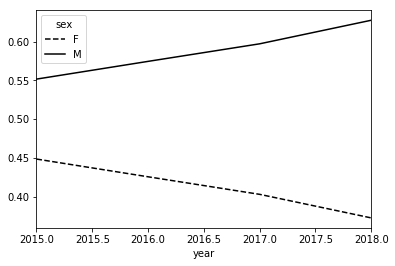

In [47]:
table.plot(style={'M': 'k-', 'F': 'k--'})

The graph above shows that names starting with "Alex" have become more popular for boys and less popular for girls.

### Has "Donald" become a less popular name?
- Yes, proportion of babies born with the name "Donald" has decreased from 2015 to 2018 as shown below.

In [63]:
table = names[names.name == "Donald"].pivot_table('prop', index ='year', aggfunc='sum')
table

,prop
year,
2015,0.000361
2016,0.000330
2017,0.000326
2018,0.000296


### Has "Elon" become a more popular name?
- Yes, proportion of babies born with the name "Elon" has increased from 2015 to 2018 as shown below.

In [64]:
table = names[names.name == "Elon"].pivot_table('prop', index ='year', aggfunc='sum')
table

,prop
year,
2015,0.000051
2016,0.000077
2017,0.000106
2018,0.000123


Data Source: https://www.ssa.gov/oact/babynames/limits.html